In [1]:
import pandas as pd
df = pd.read_csv('location_rev.csv')

df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [2]:
X = df[['num_competitors',
       'median_income',
       'num_loyalty_members',
       'population_density',
       'location_age'
       ]]
y = df['revenue']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [6]:
model.intercept_

-51068.63644236389

In [7]:
single_location = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_location)

array([27573.21782447])

In [8]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

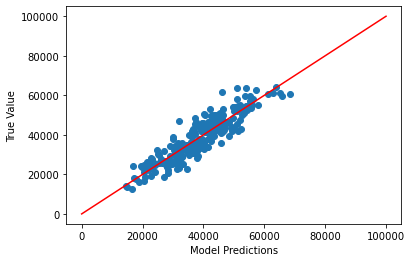

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')
plt.show()

In [10]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.9061597827907563, 1.1552714895196922e-94)